<a href="https://colab.research.google.com/github/pnabende/acholi-corpora/blob/master/aedes_classification_version1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir /content/drive/MyDrive/peter-nabende/research/research-projects/RESEARCH-GRANTS-SUCCESSFUL/2023-AHUMAIN/BELGIUM-TRAINING/WEEK2/aedes-mosquitoes-data/original-aedes

In [ ]:
!unzip /content/drive/MyDrive/peter-nabende/research/research-projects/RESEARCH-GRANTS-SUCCESSFUL/2023-AHUMAIN/BELGIUM-TRAINING/WEEK2/aedes-mosquitoes-data/original-aedes-data.zip -d /content/drive/MyDrive/peter-nabende/research/research-projects/RESEARCH-GRANTS-SUCCESSFUL/2023-AHUMAIN/BELGIUM-TRAINING/WEEK2/aedes-mosquitoes-data/original-aedes

Archive:  /content/drive/MyDrive/peter-nabende/research/research-projects/RESEARCH-GRANTS-SUCCESSFUL/2023-AHUMAIN/BELGIUM-TRAINING/WEEK2/aedes-mosquitoes-data/original-aedes-data.zip
   creating: /content/drive/MyDrive/peter-nabende/research/research-projects/RESEARCH-GRANTS-SUCCESSFUL/2023-AHUMAIN/BELGIUM-TRAINING/WEEK2/aedes-mosquitoes-data/original-aedes/original-aedes-data/
  inflating: /content/drive/MyDrive/peter-nabende/research/research-projects/RESEARCH-GRANTS-SUCCESSFUL/2023-AHUMAIN/BELGIUM-TRAINING/WEEK2/aedes-mosquitoes-data/original-aedes/original-aedes-data/.DS_Store  
  inflating: /content/drive/MyDrive/peter-nabende/research/research-projects/RESEARCH-GRANTS-SUCCESSFUL/2023-AHUMAIN/BELGIUM-TRAINING/WEEK2/aedes-mosquitoes-data/original-aedes/__MACOSX/original-aedes-data/._.DS_Store  
   creating: /content/drive/MyDrive/peter-nabende/research/research-projects/RESEARCH-GRANTS-SUCCESSFUL/2023-AHUMAIN/BELGIUM-TRAINING/WEEK2/aedes-mosquitoes-data/original-aedes/original-aede

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as implt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
train_path = '/content/drive/MyDrive/peter-nabende/research/research-projects/RESEARCH-GRANTS-SUCCESSFUL/2023-AHUMAIN/BELGIUM-TRAINING/WEEK2/aedes-mosquitoes-data/original-aedes/original-aedes-data/training'
val_path = '/content/drive/MyDrive/peter-nabende/research/research-projects/RESEARCH-GRANTS-SUCCESSFUL/2023-AHUMAIN/BELGIUM-TRAINING/WEEK2/aedes-mosquitoes-data/original-aedes/original-aedes-data/validation'

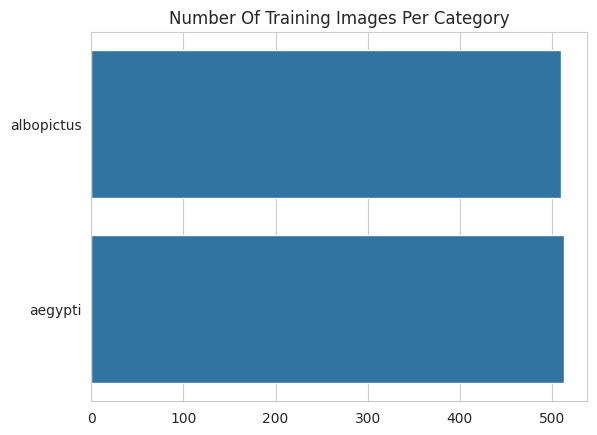

In [3]:
category_names = os.listdir(train_path) # output: ['aegypti', 'albopictus']
nb_categories = len(category_names) # output: 2
train_images = []

for category in category_names:
    folder = train_path + "/" + category
    train_images.append(len(os.listdir(folder)))

sns.barplot( x=train_images, y=category_names).set_title("Number Of Training Images Per Category");

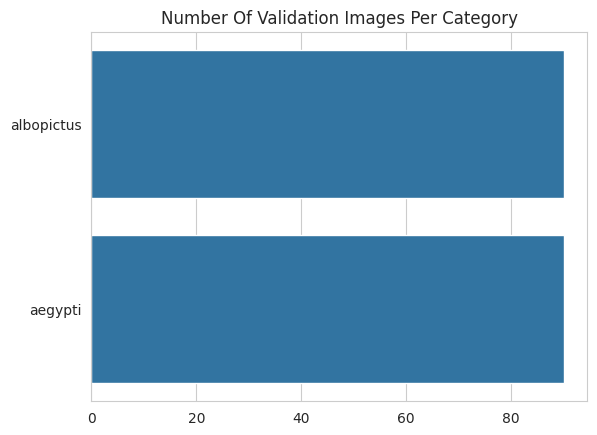

In [5]:
val_images = []
for category in category_names:
    folder2 = val_path + "/" + category
    val_images.append(len(os.listdir(folder2)))

sns.barplot(x=val_images, y=category_names).set_title("Number Of Validation Images Per Category");

In [ ]:
print(val_path)

/content/drive/MyDrive/peter-nabende/research/research-projects/RESEARCH-GRANTS-SUCCESSFUL/2023-AHUMAIN/BELGIUM-TRAINING/WEEK2/aedes-mosquitoes-data/original-aedes/original-aedes-data/validation


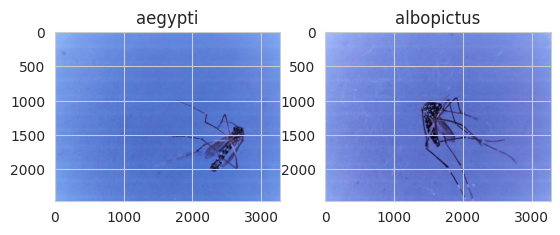

In [6]:
train_aegypti = "/content/drive/MyDrive/peter-nabende/research/research-projects/RESEARCH-GRANTS-SUCCESSFUL/2023-AHUMAIN/BELGIUM-TRAINING/WEEK2/aedes-mosquitoes-data/original-aedes/original-aedes-data/training/aegypti"
train_albopictus = "/content/drive/MyDrive/peter-nabende/research/research-projects/RESEARCH-GRANTS-SUCCESSFUL/2023-AHUMAIN/BELGIUM-TRAINING/WEEK2/aedes-mosquitoes-data/original-aedes/original-aedes-data/training/albopictus"

img1 = implt.imread(train_aegypti + "/aegypti1b.jpg")
img2 = implt.imread(train_albopictus + "/albopictus1a.jpg")

plt.subplot(1, 2, 1)
plt.title('aegypti')
plt.imshow(img1)
plt.subplot(1, 2, 2)
plt.title('albopictus')
plt.imshow(img2)
plt.show()

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be augmented
"""train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest') """

train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_path,  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1/255)

validation_generator = train_datagen.flow_from_directory(
        val_path,
        target_size=(300, 300),
        class_mode='binary')

Found 1023 images belonging to 2 classes.
Found 180 images belonging to 2 classes.


In [ ]:
!ls -a /content/drive/MyDrive/peter-nabende/research/research-projects/RESEARCH-GRANTS-SUCCESSFUL/2023-AHUMAIN/BELGIUM-TRAINING/WEEK2/aedes-mosquitoes-data/original-aedes/original-aedes-data/validation/aegypti | wc -l

90


In [8]:
cnn_model = tf.keras.models.Sequential([
    # The first convolution
    layers.Conv2D(16, 3, activation='relu', input_shape=(300, 300, 3)),
    layers.MaxPooling2D(2, 2),
    # The second convolution
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    # The third convolution
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    # The fourth convolution
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    # The fifth convolution
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    layers.Flatten(),
    # 512 neuron hidden layer
    layers.Dense(512, activation='relu'),
    # Only 1 output neuron
    layers.Dense(1, activation='sigmoid')
])

In [9]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 64)        0

In [10]:
from tensorflow.keras.optimizers import RMSprop

cnn_model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

In [11]:
history = cnn_model.fit(
      train_generator,
      steps_per_epoch=8,
      epochs=15,
      verbose=1,
      validation_data=validation_generator)

Epoch 1/15
8/8 [==============================] - 463s 57s/step - loss: 0.6964 - acc: 0.4868 - val_loss: 0.6928 - val_acc: 0.6889
Epoch 2/15
8/8 [==============================] - 163s 21s/step - loss: 0.6935 - acc: 0.5064 - val_loss: 0.6939 - val_acc: 0.5000
Epoch 3/15
8/8 [==============================] - 142s 18s/step - loss: 0.6940 - acc: 0.4985 - val_loss: 0.6928 - val_acc: 0.5000
Epoch 4/15
8/8 [==============================] - 157s 20s/step - loss: 0.6926 - acc: 0.5259 - val_loss: 0.6921 - val_acc: 0.5000
Epoch 5/15
8/8 [==============================] - 137s 18s/step - loss: 0.6929 - acc: 0.5337 - val_loss: 0.6905 - val_acc: 0.5056
Epoch 6/15
8/8 [==============================] - 136s 17s/step - loss: 0.6784 - acc: 0.5591 - val_loss: 1.9846 - val_acc: 0.5000
Epoch 7/15
8/8 [==============================] - 134s 17s/step - loss: 0.8293 - acc: 0.5484 - val_loss: 0.6561 - val_acc: 0.6111
Epoch 8/15
8/8 [==============================] - 135s 17s/step - loss: 0.6685 - acc: 0.59

Text(0, 0.5, 'Accuracy')

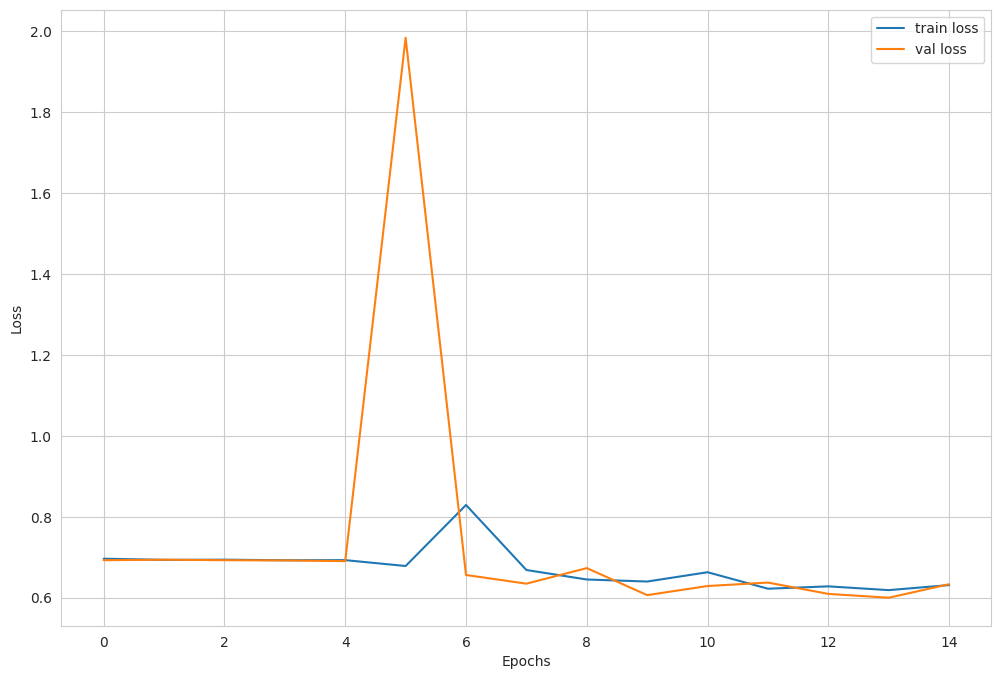

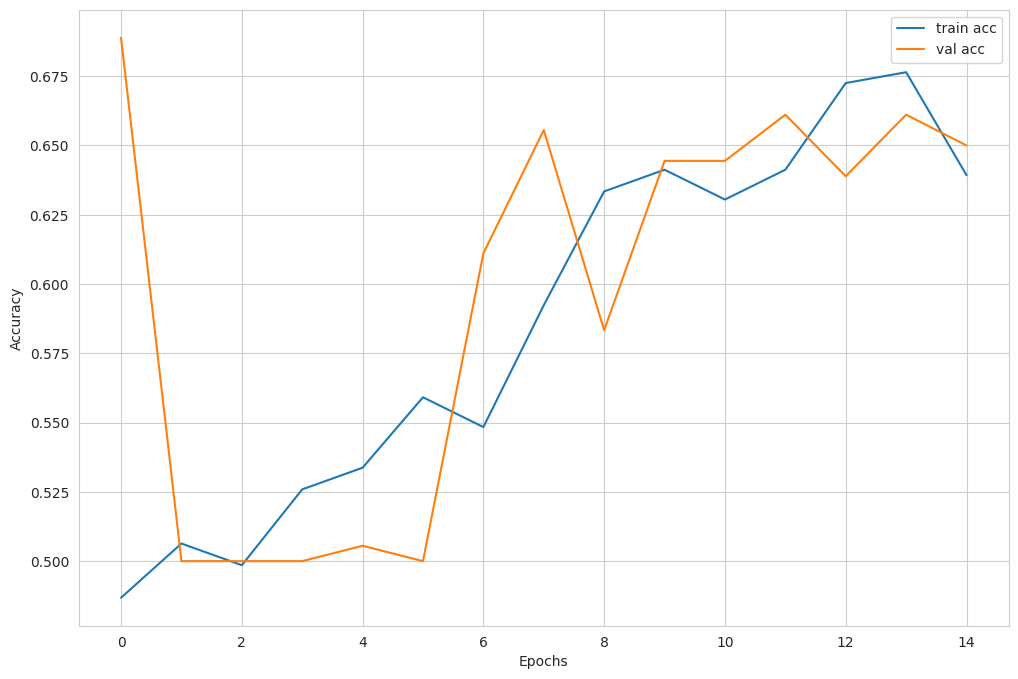

In [12]:
plt.figure(figsize = (12, 8))

# Plotting the Training and Validation Loss
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Plotting the Training and Validation Accuracy
plt.figure(figsize = (12, 8))
plt.plot(history.history['acc'],label='train acc')
plt.plot(history.history['val_acc'],label='val acc')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")